In [211]:
import pandas as pd
import numpy as np
import seaborn as sn
from scipy import stats

In [212]:
BT= pd.read_csv('bank_marketing_training')
BT

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no
26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes
26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963,no
26872,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes


In [213]:
BT.shape

(26874, 21)

<AxesSubplot:title={'center':'days_since_previous histogram'}, ylabel='Frequency'>

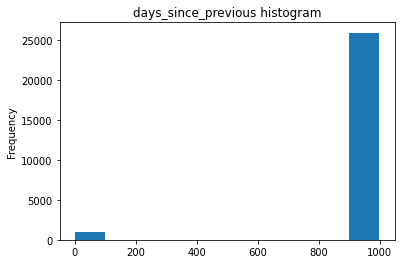

In [214]:
BT['days_since_previous'].plot(kind='hist',title='days_since_previous histogram')

<AxesSubplot:title={'center':'days_since_previous histogram'}, ylabel='Frequency'>

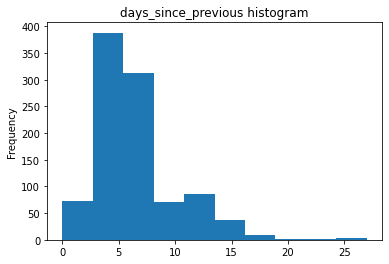

In [215]:
BT['days_since_previous']=BT['days_since_previous'].replace({999:np.NaN})
BT['days_since_previous'].plot(kind='hist',title='days_since_previous histogram')

In [216]:
BT.iloc[0]

age                             56
job                      housemaid
marital                    married
education                 basic.4y
default                         no
housing                         no
loan                            no
contact                  telephone
month                          may
day_of_week                    mon
duration                       261
campaign                         1
days_since_previous            NaN
previous                         0
previous_outcome       nonexistent
emp.var.rate                   1.1
cons.price.idx              93.994
cons.conf.idx                -36.4
euribor3m                    4.857
nr.employed                   5191
response                        no
Name: 0, dtype: object

In [217]:
BT['education_numeric']=BT['education']
BT.groupby('education_numeric').count()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
education_numeric,,,,,,,,,,,,,,,,,,,,,
basic.4y,2688,2688,2688,2688,2688,2688,2688,2688,2688,2688,...,2688,91,2688,2688,2688,2688,2688,2688,2688,2688
basic.6y,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498,...,1498,30,1498,1498,1498,1498,1498,1498,1498,1498
basic.9y,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,...,4050,76,4050,4050,4050,4050,4050,4050,4050,4050
high.school,6130,6130,6130,6130,6130,6130,6130,6130,6130,6130,...,6130,214,6130,6130,6130,6130,6130,6130,6130,6130
illiterate,12,12,12,12,12,12,12,12,12,12,...,12,0,12,12,12,12,12,12,12,12
professional.course,3423,3423,3423,3423,3423,3423,3423,3423,3423,3423,...,3423,131,3423,3423,3423,3423,3423,3423,3423,3423
university.degree,7946,7946,7946,7946,7946,7946,7946,7946,7946,7946,...,7946,372,7946,7946,7946,7946,7946,7946,7946,7946
unknown,1127,1127,1127,1127,1127,1127,1127,1127,1127,1127,...,1127,68,1127,1127,1127,1127,1127,1127,1127,1127


In [218]:
dict_edu= {'education_numeric':{"illiterate":0,"basic.4y":4,
                                "basic.6y":6,"basic.9y":9,"high.school":12,
          "professional.course":12,"university.degree":16,"unknown":np.NaN}}
BT.replace(dict_edu,inplace=True)
BT

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,education_numeric
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,NaN
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,NaN,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26869,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no,16.0
26870,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,16.0
26871,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,9.0,1,success,-1.1,94.767,-50.8,1.028,4963,no,4.0
26872,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,NaN,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes,12.0


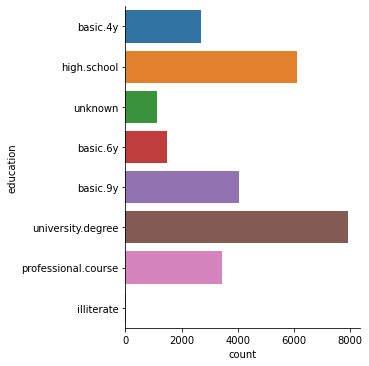

In [219]:
sn.catplot(y='education', kind='count',data=BT)

In [220]:
BT['age_z']=stats.zscore(BT['age'])
BT.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,education_numeric,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4.0,1.539625
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,1.635778
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,NaN,0.097330
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,-1.441118
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no,12.0,-1.056506


In [221]:
outliers_BT=BT.query('age_z > 3 | age_z < -3')
outliers_BT

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,education_numeric,age_z
18166,73,retired,married,university.degree,no,yes,no,cellular,mar,tue,...,1,failure,-1.8,92.843,-50.0,1.687,5099,no,16.0,3.174226
18179,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,0,nonexistent,-1.8,92.843,-50.0,1.663,5099,no,4.0,4.616521
18181,88,retired,divorced,basic.4y,no,no,no,cellular,mar,wed,...,0,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,4.0,4.616521
18183,88,retired,divorced,basic.4y,no,yes,yes,cellular,mar,wed,...,0,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,4.0,4.616521
18186,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,0,nonexistent,-1.8,92.843,-50.0,1.663,5099,yes,4.0,4.616521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26735,84,retired,divorced,basic.4y,unknown,yes,no,cellular,oct,fri,...,0,nonexistent,-1.1,94.601,-49.5,0.993,4963,no,4.0,4.231909
26739,74,retired,divorced,basic.4y,no,yes,no,cellular,oct,mon,...,0,nonexistent,-1.1,94.601,-49.5,1.000,4963,no,4.0,3.270379
26740,74,retired,divorced,basic.4y,no,yes,no,cellular,oct,mon,...,2,success,-1.1,94.601,-49.5,1.000,4963,no,4.0,3.270379
26750,81,retired,married,basic.4y,no,yes,no,cellular,oct,wed,...,2,failure,-1.1,94.601,-49.5,1.016,4963,yes,4.0,3.943450


In [222]:
outliers_BT_sorted=outliers_BT.sort_values(['age_z'], ascending=False)
outliers_BT_sorted[['age' , 'marital']].head()

,age,marital
24840,91,married
24833,91,married
26520,89,divorced
26015,89,divorced
23628,88,divorced
